In [152]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import root_mean_squared_log_error

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [42]:
data = pd.read_csv('../cleaned_dataset_without_na.csv', delimiter='|')
data.head()

,title,area,number_of_rooms,floor,type_of_market,parking,elevator,year_of_creation,internet,type_of_building,basement,price_for_m2_in_PLN,balcony,garden,terrace,street,district,city,latitude,longtitude
0,"Apartament inwestycyjny, ostatnie piętro, k/Sk...",24.89,1.0,4-6,secondary,0,1,2022.0,1.0,Mieszkanie,0.0,16749.98,0,0,0,śląska 12,przymorze,gdansk,54.406171,18.576846
1,Apartament inwestycyjny Śląska 12 z umową najmu!,25.72,1.0,0,secondary,0,1,2022.0,1.0,Mieszkanie,0.0,18500.00,0,0,0,śląska 12,przymorze,gdansk,54.406171,18.576846
2,"Nowe mieszkanie, wykończone - Mariana Kołodzieja",34.38,2.0,1-3,secondary,1,1,2022.0,1.0,Mieszkanie,0.0,15997.67,1,0,0,mariana kołodzieja,ujeścisko-łostowice,gdansk,54.334542,18.585750
3,"Wyjątkowe mieszkanie w centrum Gdyni, blisko l...",101.58,4.0,4-6,secondary,0,1,1997.0,1.0,Mieszkanie,0.0,11468.79,0,0,0,janusza korczaka,redłowo,gdynia,54.494118,18.543134
4,Mieszkanie w świetnej lokalizacji Gdynia Dąbrowa,68.00,3.0,1-3,secondary,0,0,2000.0,1.0,Mieszkanie,1.0,10279.41,1,0,0,oliwkowa,dąbrowa,gdynia,54.471180,18.470508


In [43]:
data = data.drop('title', axis=1)

In [44]:
data.head()

,area,number_of_rooms,floor,type_of_market,parking,elevator,year_of_creation,internet,type_of_building,basement,price_for_m2_in_PLN,balcony,garden,terrace,street,district,city,latitude,longtitude
0,24.89,1.0,4-6,secondary,0,1,2022.0,1.0,Mieszkanie,0.0,16749.98,0,0,0,śląska 12,przymorze,gdansk,54.406171,18.576846
1,25.72,1.0,0,secondary,0,1,2022.0,1.0,Mieszkanie,0.0,18500.00,0,0,0,śląska 12,przymorze,gdansk,54.406171,18.576846
2,34.38,2.0,1-3,secondary,1,1,2022.0,1.0,Mieszkanie,0.0,15997.67,1,0,0,mariana kołodzieja,ujeścisko-łostowice,gdansk,54.334542,18.585750
3,101.58,4.0,4-6,secondary,0,1,1997.0,1.0,Mieszkanie,0.0,11468.79,0,0,0,janusza korczaka,redłowo,gdynia,54.494118,18.543134
4,68.00,3.0,1-3,secondary,0,0,2000.0,1.0,Mieszkanie,1.0,10279.41,1,0,0,oliwkowa,dąbrowa,gdynia,54.471180,18.470508


In [208]:
A = data.drop(['price_for_m2_in_PLN', 'street', 'city'], axis=1)
b = data['price_for_m2_in_PLN']

In [209]:
#A = np.column_stack([np.ones(A.shape[0]), A])

In [210]:
X_train, X_test, y_train, y_test = train_test_split(A, b, test_size=0.2, random_state=0)

In [211]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(9663, 16) (2416, 16) (9663,) (2416,)


In [212]:
b.dtype

dtype('float64')

> DEBIL MOMENT

In [213]:
#encoder_one_hot = OneHotEncoder()
#X_train_one_hot = encoder_one_hot.fit_transform(X_train[['floor', 'type_of_market', 'type_of_building', 'district']])

In [214]:
num_pipeline = make_pipeline(StandardScaler())
cat_pipeline = make_pipeline(OneHotEncoder(handle_unknown="ignore"))

In [215]:
preprocessor = ColumnTransformer([("cat", cat_pipeline, make_column_selector(dtype_include=object)),], remainder=num_pipeline)

In [216]:
preprocessor = preprocessor.fit(X_train, y_train)

In [217]:
preprocessor.get_feature_names_out()

array(['cat__floor_0', 'cat__floor_1-3', 'cat__floor_4-6',
       'cat__floor_8+', 'cat__type_of_market_primary',
       'cat__type_of_market_secondary', 'cat__type_of_building_Dom',
       'cat__type_of_building_Mieszkanie', 'cat__district_aniołki',
       'cat__district_babie doły', 'cat__district_brodwino',
       'cat__district_brzeźno', 'cat__district_brętowo',
       'cat__district_chełm', 'cat__district_chwarzno-wiczlino',
       'cat__district_chylonia', 'cat__district_cisowa',
       'cat__district_dolny sopot', 'cat__district_działki leśne',
       'cat__district_dąbrowa', 'cat__district_grabówek',
       'cat__district_górny sopot', 'cat__district_jasień',
       'cat__district_kamienna góra', 'cat__district_kamienny potok',
       'cat__district_karlikowo', 'cat__district_karwiny',
       'cat__district_kokoszki', 'cat__district_leszczynki',
       'cat__district_letnica', 'cat__district_matarnia',
       'cat__district_mały kack', 'cat__district_młyniska',
       'cat__dis

In [218]:
X_train_preprocessed = preprocessor.transform(X_train)

In [219]:
model = LinearRegression()

In [220]:
model.fit(X_train_preprocessed, y_train)

LinearRegression()

In [221]:
X_test_preprocessed = preprocessor.transform(X_test)

In [222]:
y_pred = model.predict(X_test_preprocessed)

In [223]:
mse = mean_squared_error(y_test, y_pred)
print(f"One-Hot Encoding Model - Mean Squared Error: {mse}")

One-Hot Encoding Model - Mean Squared Error: 25416932.60289176


In [224]:
rmse = root_mean_squared_error(y_test, y_pred)
rmse

5041.520862090304

In [225]:
rmsle = root_mean_squared_log_error(y_test, y_pred)
rmsle

0.6310290320280236

In [231]:
for i in range(20):
    print(f"Predicted: {y_pred[i]}, Actual: {y_test.iloc[i]}")

Predicted: 10542.54403277189, Actual: 9839.26
Predicted: 13290.049945235842, Actual: 12500.0
Predicted: 12631.797917078948, Actual: 12542.86
Predicted: 13488.708635396806, Actual: 12600.0
Predicted: 26642.268599582443, Actual: 30000.0
Predicted: 12042.501547667192, Actual: 12206.0
Predicted: 15787.042040513777, Actual: 15248.0
Predicted: 20915.123300272495, Actual: 21875.0
Predicted: 13281.606692322675, Actual: 1201.0
Predicted: 16696.93631262064, Actual: 9896.91
Predicted: 18105.70955517152, Actual: 12836.55
Predicted: 15219.08863462675, Actual: 15104.71
Predicted: 14217.36448721966, Actual: 14444.0
Predicted: 13052.518245399686, Actual: 11448.0
Predicted: 11892.551475713919, Actual: 18600.0
Predicted: 24244.051859713312, Actual: 34441.66
Predicted: 14161.535126501278, Actual: 15600.0
Predicted: 12711.649834744177, Actual: 6939.0
Predicted: 24287.889625348427, Actual: 38543.0
Predicted: 22950.593400366204, Actual: 27531.65


In [226]:
print(X_test_preprocessed.shape, y_test.shape, y_pred.shape)

(2416, 80) (2416,) (2416,)


In [227]:
coefficients = model.coef_
feature_names = preprocessor.get_feature_names_out()
d = {feature_names[i]: coefficients[i] for i in range(len(feature_names))}
d

{'cat__floor_0': -67.57642940272348,
 'cat__floor_1-3': -135.63297240794626,
 'cat__floor_4-6': -341.53850607438494,
 'cat__floor_8+': 544.7479078862498,
 'cat__type_of_market_primary': -892.3125095613544,
 'cat__type_of_market_secondary': 892.3125095572822,
 'cat__type_of_building_Dom': -1779.338487866794,
 'cat__type_of_building_Mieszkanie': 1779.338487865273,
 'cat__district_aniołki': 1841.822425510651,
 'cat__district_babie doły': -2697.3971684356416,
 'cat__district_brodwino': 2630.094785049891,
 'cat__district_brzeźno': 3759.6279756601684,
 'cat__district_brętowo': -1592.0562126783532,
 'cat__district_chełm': -3230.284402132885,
 'cat__district_chwarzno-wiczlino': -5091.877252049984,
 'cat__district_chylonia': -3271.0962841075157,
 'cat__district_cisowa': -3721.982830693601,
 'cat__district_dolny sopot': 13268.624639225556,
 'cat__district_działki leśne': 715.5170316080998,
 'cat__district_dąbrowa': -2894.2764536057293,
 'cat__district_grabówek': -1830.8313670798404,
 'cat__distr

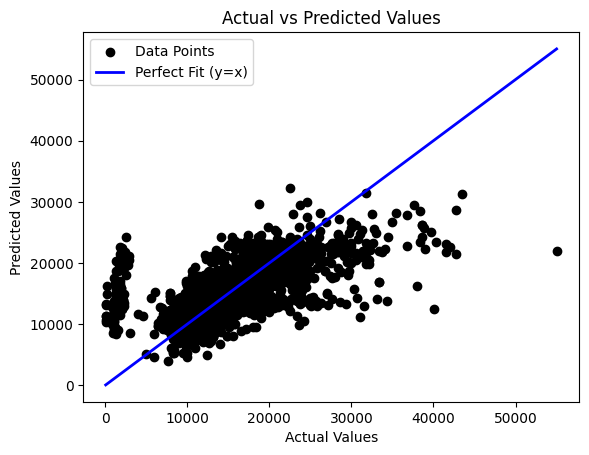

In [228]:
# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred, color="black", label="Data Points")

# Plot a reference line (y = x) to show perfect predictions
x = np.linspace(min(y_test), max(y_test), 100)
plt.plot(x, x, color="blue", linewidth=2, label="Perfect Fit (y=x)")

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

# Display legend
plt.legend()

# Show the plot
plt.show()

> Decision Trees

In [232]:
from sklearn.tree import DecisionTreeRegressor

DT_model = DecisionTreeRegressor()
DT_model.fit(X_train_preprocessed, y_train)

DecisionTreeRegressor()

In [233]:
y_pred_DT = DT_model.predict(X_test_preprocessed)

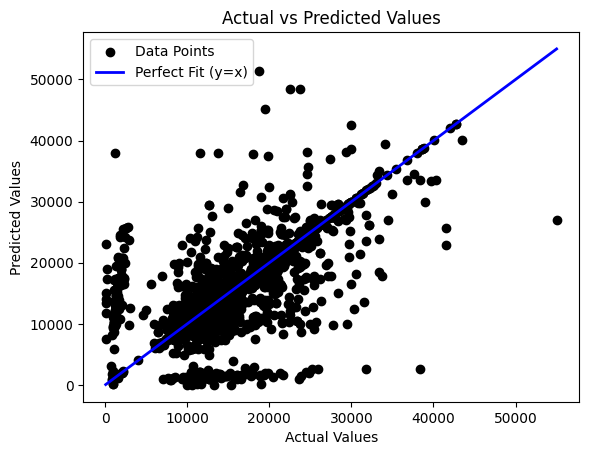

In [236]:
# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred_DT, color="black", label="Data Points")

# Plot a reference line (y = x) to show perfect predictions
x = np.linspace(min(y_test), max(y_test), 100)
plt.plot(x, x, color="blue", linewidth=2, label="Perfect Fit (y=x)")

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

# Display legend
plt.legend()

# Show the plot
plt.show()

In [235]:
rmse_DT = root_mean_squared_error(y_test, y_pred_DT)
rmse_DT

5486.309833154575

> Random forest

In [238]:
from sklearn.ensemble import RandomForestRegressor

RF_model = RandomForestRegressor()
RF_model.fit(X_train_preprocessed, y_train)

RandomForestRegressor()

In [239]:
y_pred_RF = RF_model.predict(X_test_preprocessed)

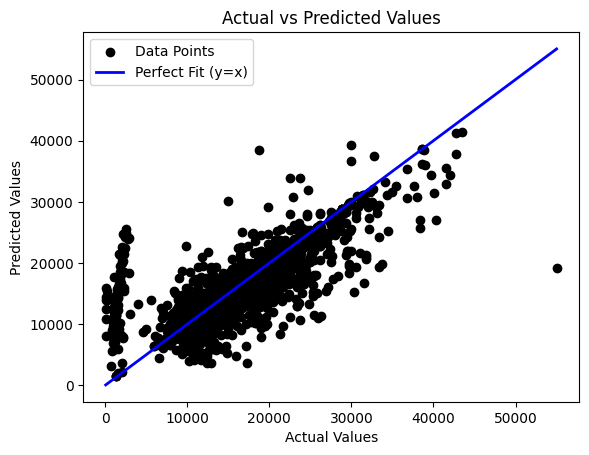

In [240]:
# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred_RF, color="black", label="Data Points")

# Plot a reference line (y = x) to show perfect predictions
x = np.linspace(min(y_test), max(y_test), 100)
plt.plot(x, x, color="blue", linewidth=2, label="Perfect Fit (y=x)")

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

# Display legend
plt.legend()

# Show the plot
plt.show()

In [241]:
rmse_RF = root_mean_squared_error(y_test, y_pred_RF)
rmse_RF

4162.479012447799